# Possible Data Preparation Steps

In [554]:
import os
import sys
import pandas as pd
import math
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from scipy.stats import zscore


import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.width', None)  # Show all rows


In [61]:
os.chdir('/Users/emilyli/workspace/datasets/')
# df = pd.read_csv('customer_segmentation.csv')



In [472]:
# df import

os.chdir('/Users/emilyli/workspace/datasets/')
# df = pd.read_csv('customer_segmentation.csv')


df = pd.read_csv('Financials.csv')

# Clean df Column Names

In [473]:
def clean_column_names(df):
    # Clean column names
    cleaned_columns = [col.strip().replace(' ', '_').lower() for col in df.columns]
    # print(cleaned_columns)
    df.columns = cleaned_columns
    return df

df = clean_column_names(df)

# Rename each df Column

In [538]:
def rename_colnames(df, substring):
    
    df_copy = df.copy()
    for col in df.columns:
        new_col_name = col + substring
        df_copy.rename(columns={col: new_col_name}, inplace=True)

    return(df_copy)


df1 = rename_colnames(df, '_rm_by_iqr')

In [539]:
df2 = rename_colnames(df, '_rm_by_3std')

In [540]:
df3 = rename_colnames(df, '_rm_by_zscore')

In [567]:
df4 = rename_colnames(df, '_iqr')
df5 = rename_colnames(df, '_std')
df6 = rename_colnames(df, '_zscore')

In [572]:
df5.isna().sum()

units_sold_std             0
manufacturing_price_std    0
sale_price_std             0
gross_sales_std            0
discounts_std              0
sales_std                  0
cogs_std                   0
profit_std                 0
month_number_std           0
year_std                   0
dtype: int64

In [566]:
df.isna().sum()

units_sold             0
manufacturing_price    0
sale_price             0
gross_sales            0
discounts              0
sales                  0
cogs                   0
profit                 0
month_number           0
year                   0
dtype: int64

In [542]:
df1.columns

Index(['units_sold_rm_by_iqr', 'manufacturing_price_rm_by_iqr',
       'sale_price_rm_by_iqr', 'gross_sales_rm_by_iqr', 'discounts_rm_by_iqr',
       'sales_rm_by_iqr', 'cogs_rm_by_iqr', 'profit_rm_by_iqr',
       'month_number_rm_by_iqr', 'year_rm_by_iqr'],
      dtype='object')

In [543]:
df2.columns

Index(['units_sold_rm_by_3std', 'manufacturing_price_rm_by_3std',
       'sale_price_rm_by_3std', 'gross_sales_rm_by_3std',
       'discounts_rm_by_3std', 'sales_rm_by_3std', 'cogs_rm_by_3std',
       'profit_rm_by_3std', 'month_number_rm_by_3std', 'year_rm_by_3std'],
      dtype='object')

In [544]:
df3.isna().sum()

units_sold_rm_by_zscore             0
manufacturing_price_rm_by_zscore    0
sale_price_rm_by_zscore             0
gross_sales_rm_by_zscore            0
discounts_rm_by_zscore              0
sales_rm_by_zscore                  0
cogs_rm_by_zscore                   0
profit_rm_by_zscore                 0
month_number_rm_by_zscore           0
year_rm_by_zscore                   0
dtype: int64

# Clean Dollar Amount (Remove $,-)

In [480]:
# function to clean dirty amount columns
def clean_amount(df, columns):
    for col in columns:
        if df[col].dtype == 'object':
        # Remove dollar signs and commas and convert to numeric
            # df[col] = [i.strip().replace('-', '').replace('$', '').replace(',', '') for i in df[col]]
            df[col] = df[col].str.replace(r'[$,-]', '', regex=True)
            df[col] = df[col].replace('', np.nan)
            df[col] = pd.to_numeric(df[col], errors='coerce')

            # print(rel)
        else:
            next
    return df

##############################################################################

amt_col = ['units_sold',
       'manufacturing_price', 'sale_price', 'gross_sales', 'discounts',
       'sales', 'cogs', 'profit']

df = clean_amount(df, amt_col)


In [481]:
df.columns

Index(['segment', 'country', 'product', 'discount_band', 'units_sold',
       'manufacturing_price', 'sale_price', 'gross_sales', 'discounts',
       'sales', 'cogs', 'profit', 'date', 'month_number', 'month_name',
       'year'],
      dtype='object')

# Filter Out Rows Which All Columns Are NaN

In [482]:
def remove_rows_all_nan(df):
    # Remove rows where all columns are NaN
    cleaned_df = df.dropna(how='all')
    return cleaned_df

df = remove_rows_all_nan(df)


In [486]:
df.isna().sum()

segment                0
country                0
product                0
discount_band          0
units_sold             0
manufacturing_price    0
sale_price             0
gross_sales            0
discounts              0
sales                  0
cogs                   0
profit                 0
date                   0
month_number           0
month_name             0
year                   0
dtype: int64

In [281]:
df.shape

(700, 16)

In [135]:
df.head()


,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618.50,3.00,20.00,32370.00,,32370.00,16185.00,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.00,3.00,20.00,26420.00,,26420.00,13210.00,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.00,3.00,15.00,32670.00,,32670.00,21780.00,10890.00,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,13320.00,,13320.00,8880.00,4440.00,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.00,3.00,15.00,37050.00,,37050.00,24700.00,12350.00,01/06/2014,6,June,2014


# Handling Missing Values - Imputation

In [484]:
#imputation
# to replace nan in num by random sampling of its own column
# Define a function for random sampling imputation

np.random.seed(123)
pd.options.mode.chained_assignment = None  # default='warn'
# pd.options.mode.chained_assignment = 'warn'


def random_sampling_imputation(df, columns):
    # Get non-missing values per col
    for col in columns:
        non_missing = df[col].dropna()
        # Generate random indices
        rand_index = np.random.choice(non_missing.index, size=df[col].isnull().sum(), replace=True)
         # Replace missing values with randomly sampled index's values of same col
        df[col].iloc[df[col].isnull()] = non_missing[rand_index].values
        # this part help to quickly get the random sample index used for imputation, validation
        # col1 = [int(str(x).replace(' ',',')) for x in rand_index]
        # # col = [int(x) for x in col]
        # print(col1)        
    return df


impute_col = ['discounts','profit']
df = random_sampling_imputation(df, impute_col)

In [485]:
df.describe()

,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,month_number,year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13996.226786,1.696091e+05,145475.211429,27420.691986,7.900000,2013.750000
std,867.427859,108.602612,136.775515,2.542623e+05,23240.075053,2.367263e+05,203865.506118,43010.639012,3.377321,0.433322
min,200.000000,3.000000,7.000000,1.799000e+03,18.410000,1.655080e+03,918.000000,285.600000,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,1037.700000,1.592800e+04,7490.000000,3815.707500,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,3101.200000,3.554020e+04,22506.250000,10972.500000,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,18750.000000,2.610775e+05,245607.500000,25146.400000,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


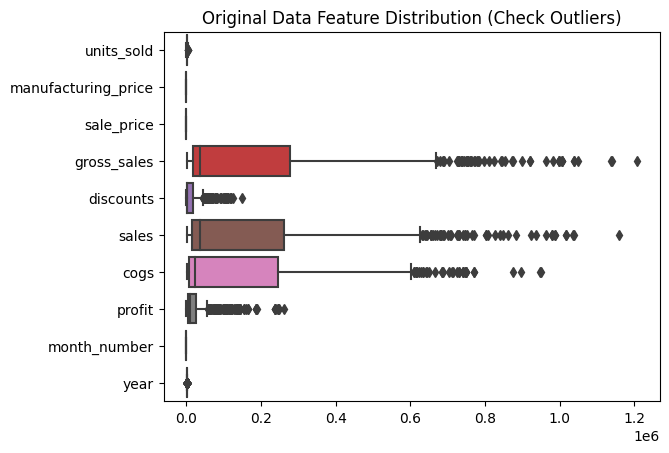

# 

In [305]:
# df import

os.chdir('/Users/emilyli/workspace/datasets/')
# df = pd.read_csv('customer_segmentation.csv')


df = pd.read_csv('Financials.csv')

# Convert Categoricals to Numericals

In [31]:
# convert using one-hot encoding/ dummy: result is each categorical level spread as individual col as boolean value, 
#result very wide df, could be highly colinear which info of multiple (new) col overlapped, unnecessary
convert_col = ['Education', 'Marital_Status']
df = pd.get_dummies(df, columns = convert_col)


# Convert categorical data to numerical using factorize: categorical to numerical level 1-to-1, mayybe beneficial for high categorical level to avoid colinearity
# factorized_idx: show the index of which coordinate w/ the numbers
df['Dt_Customer'], factorized_idx = pd.factorize(df['Dt_Customer'])



# Scaling / Normalization

In [32]:
########################################################
# Z norm transform 
scaler = StandardScaler()
# z score normalization
znorm_array = scaler.fit_transform(df)

# this step use to visualize Z normed/scaled distribution
df_znorm = pd.DataFrame(znorm_array, columns=df.columns)
########################################################

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the data
mmnorm_array = scaler.fit_transform(df)
df_mmnorm = pd.DataFrame(mmnorm_array, columns=df.columns)


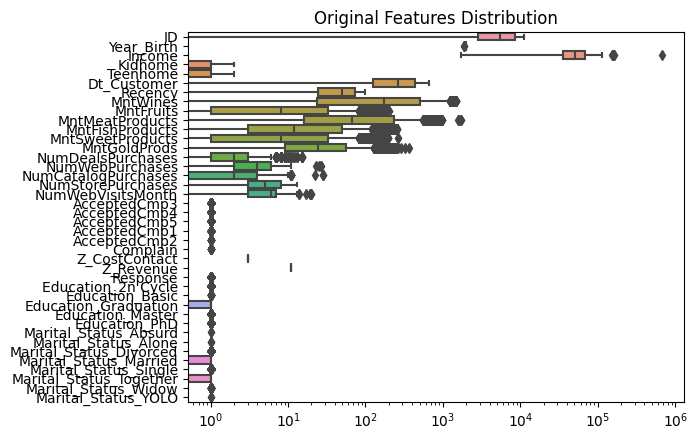

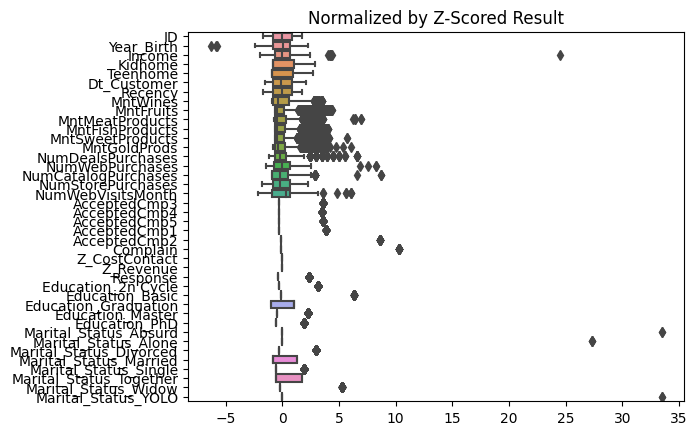

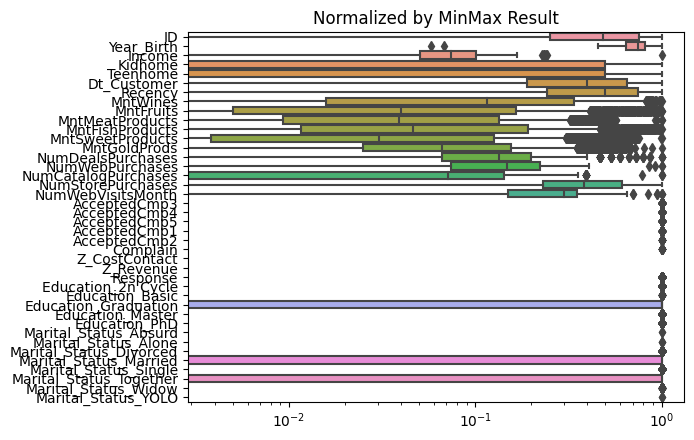

In [41]:
# show new distribution of each scaled col
# original distr
sns.boxplot(data=df, orient='h')  # 'orient' parameter to make horizontal boxplots
plt.title('Original Features Distribution')
plt.xscale('log')
plt.show()


# scaled by Z-scored
sns.boxplot(data=df_znorm, orient='h')  # 'orient' parameter to make horizontal boxplots
plt.title('Normalized by Z-Scored Result')
# plt.xscale('log')
plt.show()


# scaled by MinMax
sns.boxplot(data=df_mmnorm, orient='h')  # 'orient' parameter to make horizontal boxplots
plt.title('Normalized by MinMax Result')
plt.xscale('log')
plt.show()


# Outlier Detection & Removal

In [564]:
# remove outliers per each numerical col using either IQR, std or zcore
def remove_outliers(df, method):
    
    df = df.select_dtypes(include=['int', 'float'])    
    
    outliers_removed = pd.DataFrame()

    for col in df.columns:
        stats = df[col].describe()
        mean = stats.loc['mean']
#         min_val = stats.loc['min']
#         max_val = stats.loc['max']
        
        if method == 'IQR':
            Q1 = stats.loc['25%']
            Q3 = stats.loc['75%']
            IQR = Q3 - Q1
            lower_threshold = Q1 - 1.5 * IQR
            upper_threshold = Q3 + 1.5 * IQR

            # Remove outliers by std method:
            outliers_removed[col] = df[col][(df[col] >= lower_threshold) & (df[col] <= upper_threshold)]

        elif method == 'std':
            std = stats.loc['std']
            threshold = 3 * std
            outliers_removed[col] = df[col][abs(df[col] - mean) <= threshold]

        elif method == 'zscore':
            z_scores = zscore(df[col])
            threshold = 3
            outliers_removed[col] = df[col][abs(z_scores) <= threshold]
            
        else:
            next

    return outliers_removed


df4 = remove_outliers(df4, method = 'IQR')
df5 = remove_outliers(df5, method = 'std')
df6 = remove_outliers(df6, method = 'zscore')


## Remove Outliers Comparison:
### by std and zscore methods very similar to removee the extreme, but keep most of them; while IQR almost remove everythinng beyond max/min of IQR

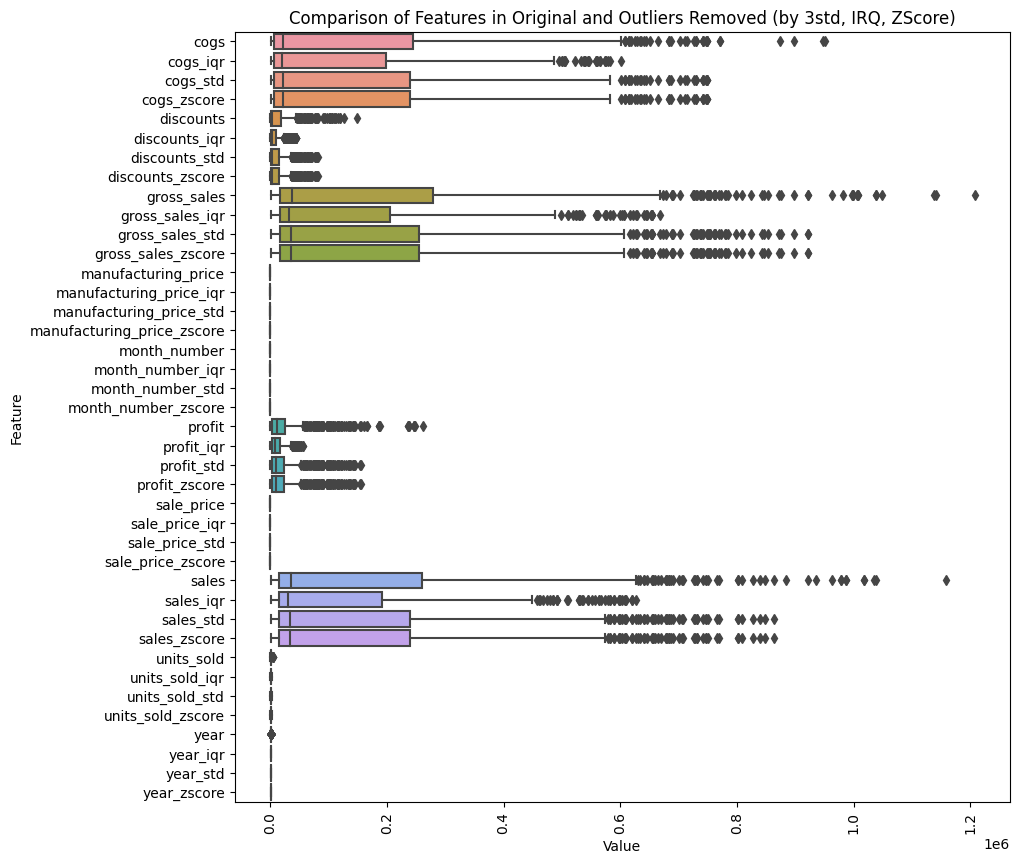

In [577]:

# Melt the DataFrames to convert them to long format
df_melted = df.melt(var_name='Feature', value_name='Value')
df4_melted = df4.melt(var_name='Feature', value_name='Value')
df5_melted = df5.melt(var_name='Feature', value_name='Value')
df6_melted = df6.melt(var_name='Feature', value_name='Value')

# Combine the melted DataFrames
combined_df = pd.concat([df_melted, df4_melted, df5_melted, df6_melted], ignore_index=True)

combined_df = combined_df.sort_values(by = 'Feature')

# Plot the combined DataFrame as boxplots
plt.figure(figsize=(10, 10))
plt.title('Comparison of Features in Original and Outliers Removed (by 3std, IRQ, ZScore)')

# Use seaborn for boxplot
# import seaborn as sns
sns.boxplot(x='Value', y='Feature', data=combined_df, orient='h'
            # hue='variable'
           )
plt.xticks(rotation=90)
plt.show()

In [523]:
df1.isna().sum() #missng due to IQR method

units_sold_v1               0
manufacturing_price_v1      0
sale_price_v1               0
gross_sales_v1             55
discounts_v1               60
sales_v1                   53
cogs_v1                    36
profit_v1                 100
month_number_v1             0
year_v1                   175
dtype: int64

# Feature Selection/ Dimension Reduction:
#### PCA: Principle Component Analysis
#### LDA: Linear Discriminant Analysis
#### t-SNE: t-Distributed Stochastic Neighbor Embedding 
#### ICA: Independent Component Analysis